Install PyTorch

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision

Imports, plotting inline, and random seed

In [0]:
import torch 
import torchvision
import numpy as np
import matplotlib.pyplot as plt 

from IPython import display 
import time

%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(seed=485)

Initial values

In [0]:
n = 28*28   # number of image pixels
m = 60000   # number of images in training set
eta = 0.1  # learning rate parameter
epsinit = 0.01  # initial size of synaptic weights
w = epsinit*torch.rand(n)   # random initialization of weight vector
b = epsinit*torch.rand(1)    # random initialization of bias 

tmax = 60000           # number of learning updates
errcl = torch.zeros(tmax)    # classification error vs. time
loss = np.zeros(tmax)

Set up train and test data.

In [0]:
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True) # train data only
mnist_test = torchvision.datasets.MNIST(root='data', train=False, download=True) # test data only

trainindices = torch.randperm(60000)
trainimages = mnist_train.train_data[trainindices]
trainlabels = mnist_train.train_labels[trainindices]

testindices = torch.randperm(10000)
testimages = mnist_test.test_data[testindices]
testlabels = mnist_test.test_labels[testindices]

Functions to visualize training (displays the weight vector, input vector, and running error).

In [0]:
def plot_image(image):
    nr, nc = image.shape 
    extent = [-0.5, nc-0.5, nr-0.5, -0.5] 
    plt.imshow(image.numpy(), extent=extent, origin='upper', interpolation='nearest')
    plt.gca().grid(False)

    
def visualize(t, errcl, loss, w, x):
    errorrate = np.divide(         #length of t
        np.cumsum(errcl[: t + 1]), #normalized by the number of samples calculated. 
        range(1, t + 2) 
    )
    lossrate = np.divide(
        np.cumsum(loss[: t + 1]),
        range(1, t + 2)
    )

    display.clear_output(wait=True)

    plt.subplot(1, 4, 1)
    plot_image(np.reshape(w, [28, 28]))
    plt.title("weight vector at t = " + str(t + 1))

    plt.subplot(1, 4, 2)
    plot_image(np.reshape(x, [28, 28]))
    plt.title("input vector")

    plt.subplot(1, 4, 3)
    plt.plot(errorrate, color='red')
    plt.title("average class error = " + str(errorrate[t]))
    plt.ylim(0, 1)

    plt.subplot(1, 4, 4)
    plt.plot(lossrate, color='blue')
    plt.title("average loss = " + str(lossrate[t]))
    plt.ylim(0, 1)
    
    plt.subplots_adjust(wspace=.5)

    plt.gcf().set_size_inches(18.5, 10.5)
    display.display(plt.gcf())

The training loop.

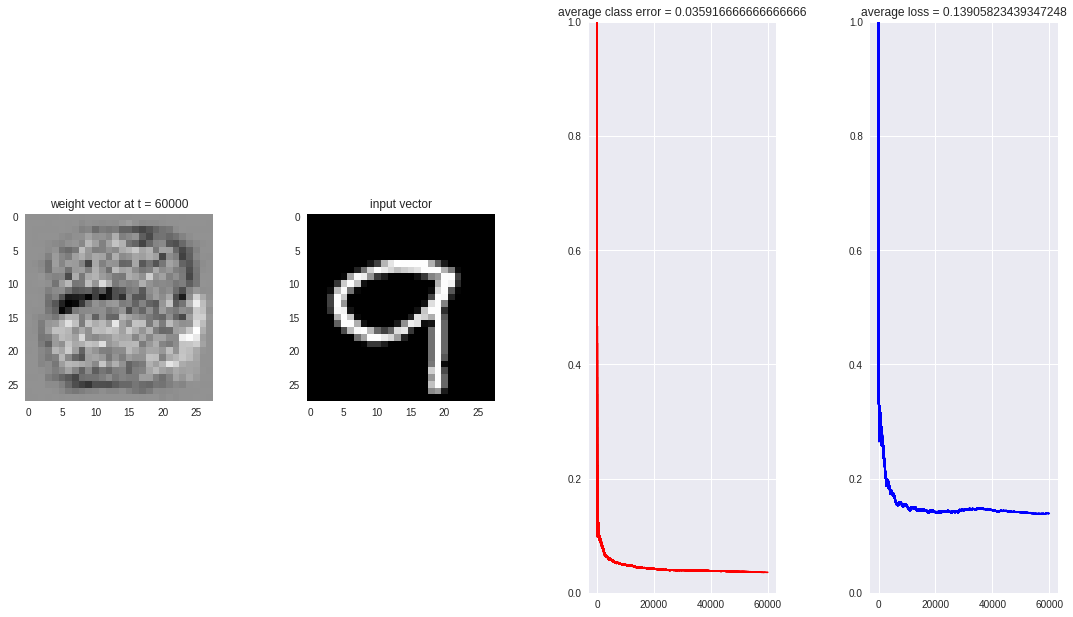

In [28]:
for t in range(0, tmax):     # iterate over the train steps
    i = torch.floor(m*torch.rand(1)).long()    # choose a random example
    x = trainimages[i].view(-1)                # flatten image
    x = x.float() / 255.0                      # normalize max value to one 
    desired = np.float64(trainlabels[i] == 2)  # get true label as a float
    actual = np.float64(torch.sum(w*x) + b > 0)
    delta = desired - actual
    errcl[t] = abs(desired - actual)           # error between true and predicted
    
    if (errcl[t] > 0):
      loss[t] = abs(np.float64(np.dot(w, x) + b))
    
    w += eta * delta * x                       # weight update
    b += eta * delta                           # bias update
    if t % 1000 == 0:    # display every 1000 time steps
        visualize(t, errcl.numpy(), loss, w, x)        
        time.sleep(0.01)    

# show final statistics
visualize(t, errcl.numpy(),loss, w, x)  
display.clear_output(wait=True)

## **Test the performance comapred with the simple baseline algorithm. **


**For the trivial recognition algorithm that always returns an output of 0. Its error rate is: **

In [33]:
#error rate

np.sum(testlabels.numpy() == 2)/10000

0.1032

**For the algorithm trained above: **

In [89]:
testinput = np.reshape(testimages.numpy(),(testlabels.numpy().shape[0],-1))
W = w.numpy()

wrongtestresult = np.logical_xor(((np.sum(testinput*W, axis = 1)+b.numpy()) > 0),(testlabels.numpy() == 2)) # show True when prediction is different from true label

#error rate

np.sum(wrongtestresult)/testlabels.numpy().shape[0]

0.0409

### Therefore, it is easy to find that the algorithm trained above has a less error rate on the test sample set. The 'always 0' algorithm has the expected error rate around 10%. However, due to the fact that we pick the samples from the data randomly, the error rate might change a little for different initilization and interation.

### Realization of 10 neurons with softmax function: 

**Initilization for 10 classes classifier**

In [0]:
m = 60000
n = 28*28
k = 10

errcl = np.zeros(tmax)
loss = np.zeros(tmax)

W = epsinit*np.random.rand(k, n)  # Now, W is a matrix instead of a weight vector
B = epsinit*np.random.rand(k)     # Now, B is a matrix instead of a weight vector

**Define the visualization function for matrix W and B. **

In [0]:
def visualize_matrix(W, errcl, loss):
    errorrate = np.divide(
        np.cumsum(errcl[: t + 1]),
        range(1, t + 2)
    )
    lossrate = np.divide(
        np.cumsum(loss[: t + 1]),
        range(1, t + 2)
    )
    display.clear_output(wait=True)
    
    for i in range (10):
        plt.subplot(3, 4, i+1)
        plot_image_numpy(np.reshape(W[i], [28, 28]))
        plt.title("weight vector at t = " + str(t + 1))
    
    plt.subplot(3, 4, 11)
    plt.plot(errorrate, color='red')
    plt.title("average class error = " + str(errorrate[t]))
    plt.ylim(0, 1)  
    
    plt.subplot(3, 4, 12)
    plt.plot(lossrate, color='blue')
    plt.title("average loss = " + str(lossrate[t]))
    
    plt.subplots_adjust(wspace=.5)
    plt.gcf().set_size_inches(18.5, 10.5)
    display.display(plt.gcf())

**Define softmax function. **

In [0]:
def softmax(array): # take a list or np.array as input
    return np.exp(array-np.max(array))/np.sum(np.exp(array-np.max(array)))

**Define a plot_image function for numpy array. **

In [0]:
def plot_image_numpy(image):
    nr, nc = image.shape 
    extent = [-0.5, nc-0.5, nr-0.5, -0.5] 
    plt.imshow(image, extent=extent, origin='upper', interpolation='nearest')
    plt.gca().grid(False)

**Iteration Loop:**


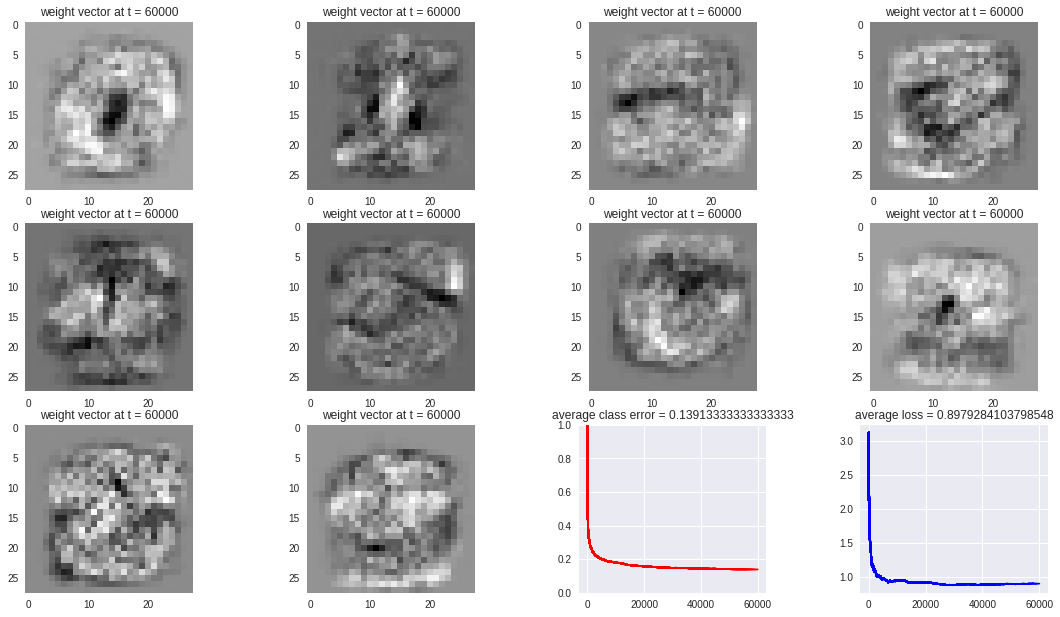

In [128]:
for t in range(0, tmax): 
    i = torch.floor(m*torch.rand(1)).long()    # choose a random example
    x = trainimages[i].view(-1)                # flatten image
    x = (x.float()).numpy() / 255.0            # normalize max value to one 
    desired = np.zeros(10)
    desired[int(trainlabels[i])] = 1           # get the desired label vector 
    
    f = softmax(np.float64(np.dot(W, x) + B))  # get prediction with softmax function
    prediction = np.zeros(10)
    prediction[f == np.max(f)] = 1
    
    for index in range (10):
        if prediction[index] != desired[index]:
            errcl[t]= 1
        
    sum_loss = 0.
    for index in range (10):
        sum_loss -= desired[index]*np.log(f[index]) # logistic regression loss function 
    loss[t] = sum_loss
        
    for k in range (10):
        if k == int(trainlabels[i]):
            W[k] += eta * (1 - f[k]) * x                     # weight update
            B += eta * (1 - f[k])                            # bias update
        else: 
            W[k] += eta * (0 - f[k]) * x                     
            B += eta * ( - f[k]) 
    if t % 1000 == 0:    # display every 1000 time steps
        visualize_matrix(W, errcl, loss)
        time.sleep(0.01)
        
visualize_matrix(W, errcl, loss)
display.clear_output(wait=True)

### Based on the result after 60000 interation, the final average claddification error rate is 13.913%, the final average loss is 0.898. 
